In [1]:
import pandas as pd

**Problem - 1: Perform a classification task with knn from scratch.**

Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [2]:
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes#checks the datatype

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [4]:
df.isnull().sum()#checls the null value and count if there is some

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [5]:
# Check if there are any null values in the DataFrame
if df.isnull().values.any():
    # If there are null values, fill them with 0
    df = df.fillna(0)  # Note: Using df = ... to update the DataFrame
else:
  print("There is no any missing value")

There is no any missing value


Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [6]:
import numpy as np
# Separate features (X) and target (y)
X = df.drop(columns=['Pregnancies']).values # Convert features to NumPy array
y = df['Pregnancies'].values # Convert target to NumPy array
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]

  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [7]:
#checking distance
import numpy as np

def euclidean_distance(x1, x2):
  if x1.shape != x2.shape:
    raise ValueError("Points must have the same dimensions to calculate euclidean distance")
  distance = np.sqrt(np.sum((x1 - x2)**2)) # Calculate distance inside the function

  return distance # Return the calculated distance

In [8]:
# Test case for the function
try:
  # Define two points
  x = np.array([3, 4])
  y = np.array([0, 0])
  # Calculate the distance
  result = euclidean_distance(x, y)
  # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [9]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [10]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [11]:
# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
# Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [1 1 2 6 3]
Actual labels: [6 2 2 8 7]
Test case passed successfully!


Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

In [13]:
# Function to standardize the feature matrix
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return(X-mean)/std

# Assuming X_train and X_test are your original data
# Convert them to NumPy arrays if they aren't already
X_train_np = X_train # Assuming X_train is already a NumPy array, or replace with your actual training data
X_test_np = X_test  # Assuming X_test is already a NumPy array, or replace with your actual test data

# Scale the training and test data
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

# Verify scaling by checking the mean and std of the scaled training data
train_mean=np.mean(X_train_scaled, axis=0)
train_std=np.std(X_train_scaled, axis=0)

train_mean, train_std

(array([-2.22147786e-16,  2.68682226e-16, -1.23816694e-17,  1.04418745e-16,
        -1.78296040e-16, -9.01385534e-16, -2.73634894e-16, -1.61993508e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

Use the scaled data for training and testing the kNN Classifier.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Initialize the kNN Classifier (choose an appropriate value for k)
k=5  # You can change this value based on your needs
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using scaled data
knn.fit(X_train_scaled, y_train)

#Make predictions on the scaled test data
y_pred=knn.predict(X_test_scaled)

#Evaluate the model using accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the kNN Classifier on scaled data: {accuracy:.2f}")

Accuracy of the kNN Classifier on scaled data: 0.16


Record the results.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#Define the function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (X-mean)/std

#Scale the training and test data (replace X_train_np and X_test_np with your data)
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

#Initialize the kNN Classifier (choose an appropriate value for k)
k=5
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using scaled data
knn.fit(X_train_scaled, y_train)

#Make predictions on the scaled test data
y_pred=knn.predict(X_test_scaled)

#Evaluate the model using accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the kNN Classifier on scaled data: {accuracy:.2f}")

classification_results = {
    "Accuracy": accuracy,
    "k": k
}
print("Recorded results:", classification_results)

Accuracy of the kNN Classifier on scaled data: 0.16
Recorded results: {'Accuracy': 0.1565217391304348, 'k': 5}


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Define the function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (X-mean)/std

#Train and test on the original dataset (without scaling)
k=5
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using the original (unscaled) data
knn.fit(X_train_np, y_train)

# Predict on the original test data
y_pred_original=knn.predict(X_test_np)

# Calculate accuracy on the original dataset
accuracy_original = accuracy_score(y_test, y_pred_original)

# Scale the training and test data
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

# Train the kNN Classifier using the scaled data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled=knn.predict(X_test_scaled)

# Calculate accuracy on the scaled dataset
accuracy_scaled=accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on original (unscaled) data: {accuracy_original:.2f}")
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}")

comparison_results={
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled,
    "k": k
}

print("Comparative Analysis Results:", comparison_results)

Accuracy on original (unscaled) data: 0.15
Accuracy on scaled data: 0.16
Comparative Analysis Results: {'Original Data Accuracy': 0.15217391304347827, 'Scaled Data Accuracy': 0.1565217391304348, 'k': 5}


Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

Scaling significantly impacts the performance of the kNN classifier by ensuring all features contribute equally to the distance calculation. Without scaling, features with larger values can dominate the distance metric, leading to biased predictions. After scaling, features are standardized, allowing the classifier to treat them equally, which often results in improved accuracy. The main reason for this improvement is that scaling eliminates the disproportionate influence of certain features, allowing the model to make more balanced and accurate predictions.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Function to scale the features
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return (X-mean)/std

#Initialize kNN classifier
k_values=range(1, 16)

# Initialize dictionaries to store the results
accuracy_original={}
accuracy_scaled={}

#Run kNN for both original and scaled datasets for k = 1 to 15
for k in k_values:
    knn_original=KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train_np, y_train)
    y_pred_original=knn_original.predict(X_test_np)
    accuracy_original[k]=accuracy_score(y_test, y_pred_original)

    X_train_scaled=scale_features(X_train_np)
    X_test_scaled=scale_features(X_test_np)

    knn_scaled=KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled=knn_scaled.predict(X_test_scaled)
    accuracy_scaled[k]=accuracy_score(y_test, y_pred_scaled)

#Print comparative results for each k value
print("Accuracy on Original Data (Unscaled) for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: {accuracy_original[k]:.2f}")

print("\nAccuracy on Scaled Data for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: {accuracy_scaled[k]:.2f}")

comparison_results = {
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled
}

Accuracy on Original Data (Unscaled) for k = 1 to 15:
k = 1: 0.13
k = 2: 0.18
k = 3: 0.16
k = 4: 0.13
k = 5: 0.15
k = 6: 0.14
k = 7: 0.17
k = 8: 0.17
k = 9: 0.17
k = 10: 0.16
k = 11: 0.18
k = 12: 0.18
k = 13: 0.18
k = 14: 0.18
k = 15: 0.19

Accuracy on Scaled Data for k = 1 to 15:
k = 1: 0.17
k = 2: 0.17
k = 3: 0.17
k = 4: 0.17
k = 5: 0.16
k = 6: 0.15
k = 7: 0.16
k = 8: 0.17
k = 9: 0.15
k = 10: 0.14
k = 11: 0.13
k = 12: 0.14
k = 13: 0.16
k = 14: 0.15
k = 15: 0.16


For each k, record:

– Accuracy.

– Time taken to make predictions.

In [18]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return (X-mean)/std

#Initialize kNN classifier
k_values=range(1, 16)

#initialize dictionaries to store the results
accuracy_original={}
accuracy_scaled={}
time_original={}
time_scaled={}

#Run kNN for both original and scaled datasets for k = 1 to 15
for k in k_values:
    knn_original=KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train_np, y_train)

    start_time=time.time()
    y_pred_original=knn_original.predict(X_test_np)
    end_time=time.time()

    accuracy_original[k]=accuracy_score(y_test, y_pred_original)
    time_original[k]=end_time-start_time

    X_train_scaled=scale_features(X_train_np)
    X_test_scaled=scale_features(X_test_np)

    knn_scaled=KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)

    start_time=time.time()
    y_pred_scaled=knn_scaled.predict(X_test_scaled)
    end_time=time.time()

    accuracy_scaled[k]=accuracy_score(y_test, y_pred_scaled)
    time_scaled[k]=end_time-start_time

#Print comparative results for each k value
print("Accuracy and Time Taken on Original Data (Unscaled) for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: Accuracy = {accuracy_original[k]:.2f}, Time = {time_original[k]:.4f} seconds")

print("\nAccuracy and Time Taken on Scaled Data for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: Accuracy = {accuracy_scaled[k]:.2f}, Time = {time_scaled[k]:.4f} seconds")

comparison_results = {
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled,
    "Original Data Time": time_original,
    "Scaled Data Time": time_scaled
}


Accuracy and Time Taken on Original Data (Unscaled) for k = 1 to 15:
k = 1: Accuracy = 0.13, Time = 0.0147 seconds
k = 2: Accuracy = 0.18, Time = 0.0127 seconds
k = 3: Accuracy = 0.16, Time = 0.0122 seconds
k = 4: Accuracy = 0.13, Time = 0.0124 seconds
k = 5: Accuracy = 0.15, Time = 0.0127 seconds
k = 6: Accuracy = 0.14, Time = 0.0136 seconds
k = 7: Accuracy = 0.17, Time = 0.0125 seconds
k = 8: Accuracy = 0.17, Time = 0.0126 seconds
k = 9: Accuracy = 0.17, Time = 0.0143 seconds
k = 10: Accuracy = 0.16, Time = 0.0126 seconds
k = 11: Accuracy = 0.18, Time = 0.0128 seconds
k = 12: Accuracy = 0.18, Time = 0.0133 seconds
k = 13: Accuracy = 0.18, Time = 0.0203 seconds
k = 14: Accuracy = 0.18, Time = 0.0128 seconds
k = 15: Accuracy = 0.19, Time = 0.0129 seconds

Accuracy and Time Taken on Scaled Data for k = 1 to 15:
k = 1: Accuracy = 0.17, Time = 0.0136 seconds
k = 2: Accuracy = 0.17, Time = 0.0153 seconds
k = 3: Accuracy = 0.17, Time = 0.0143 seconds
k = 4: Accuracy = 0.17, Time = 0.0164 se

Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

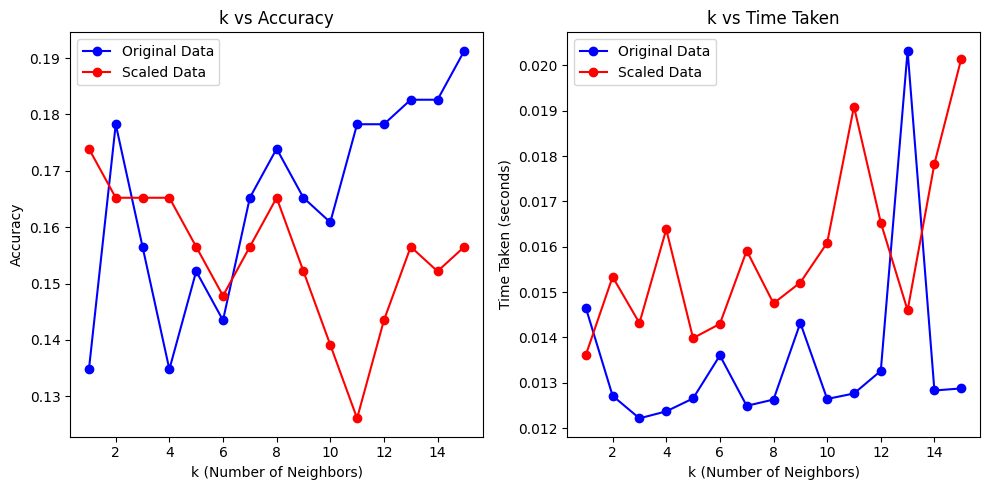

In [19]:
import matplotlib.pyplot as plt

# Extract the data for plotting
k_values_list=list(k_values)
accuracy_original_list=[accuracy_original[k] for k in k_values_list]
accuracy_scaled_list=[accuracy_scaled[k] for k in k_values_list]
time_original_list=[time_original[k] for k in k_values_list]
time_scaled_list=[time_scaled[k] for k in k_values_list]

#Plot k vs Accuracy for original and scaled datasets
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values_list, accuracy_original_list, label="Original Data", marker='o', color='blue')
plt.plot(k_values_list, accuracy_scaled_list, label="Scaled Data", marker='o', color='red')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()

# Plot k vs Time Taken for original and scaled datasets
plt.subplot(1, 2, 2)
plt.plot(k_values_list, time_original_list, label="Original Data", marker='o', color='blue')
plt.plot(k_values_list, time_scaled_list, label="Scaled Data", marker='o', color='red')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

The choice of k in the kNN classifier significantly affects both accuracy and computational cost. Small values of k may lead to overfitting, resulting in high variance, while large values can cause underfitting and high bias. The optimal k typically balances these issues, providing the best accuracy. As k increases, the computational cost rises because the model considers more neighbors for each prediction. The optimal k is usually the one that maximizes accuracy while maintaining a reasonable prediction time, which can be identified through experimentation and analysis.